In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv(r"D:\\Machine Learning\\Maths\\Social_Network_Ads.csv")

dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
X = dataset.iloc[:, [2, 3]].values  # Features (Age, Salary)
y = dataset.iloc[:, 4].values       # Target variable (Purchased: 0 or 1)


In [ ]:
# Splitting the dataset into training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [28]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (300, 2) (300,)
Testing set shape: (100, 2) (100,)


In [ ]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]


In [ ]:
# Fitting the Naive Bayes to the Training Set 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
# Predicting the test set results 
y_pred = classifier.predict(X_test)

In [35]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm 

array([[65,  3],
       [ 7, 25]], dtype=int64)

C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_15428\943143853.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


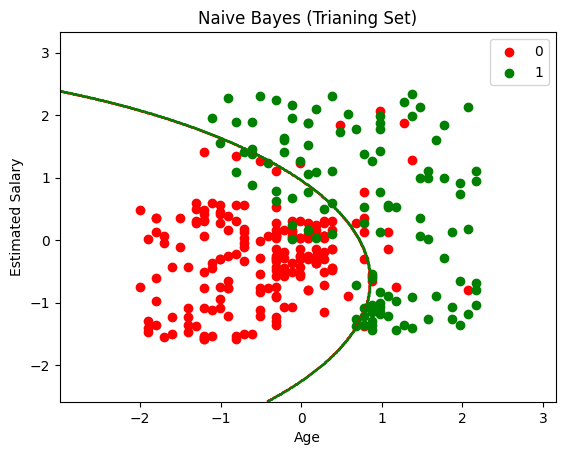

In [37]:
# Visualize the Training set results 

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()- 1, stop= X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()- 1, stop= X_set[:,1].max()+1, step = 0.01))

plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title("Naive Bayes (Trianing Set)")
plt.xlabel("Age")
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_15428\4292603883.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


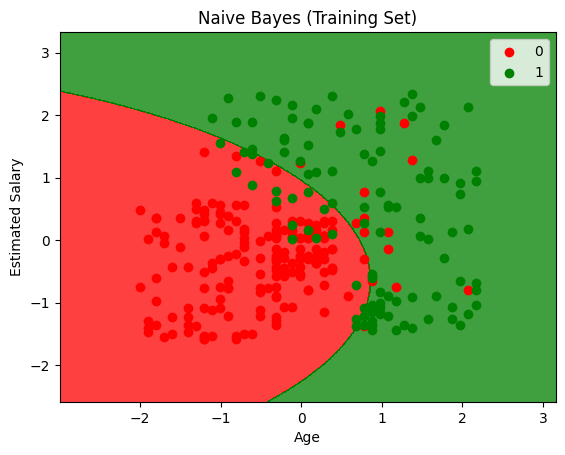

In [ ]:
# Visualize the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler #Import StandardScaler
from sklearn.naive_bayes import GaussianNB

#Assume X_train and y_train are already defined and scaled
#Also assume X_test is defined

# Scale the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Initialise the classifier and fit it
classifier = GaussianNB()
classifier.fit(X_train, y_train)

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Create an array of all points in the meshgrid
X_grid = np.array([X1.ravel(), X2.ravel()]).T

# Make predictions on the grid
# Scale the grid points before making predictions
X_grid_scaled = sc.transform(X_grid)
Z = classifier.predict(X_grid_scaled).reshape(X1.shape)

# Plot the contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title("Naive Bayes (Training Set)")
plt.xlabel("Age")
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_15428\2709785413.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


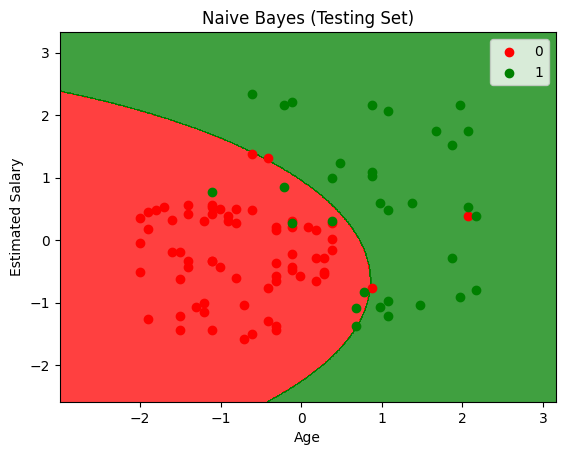

In [39]:
# Testing data visulaization 
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Create an array of all points in the meshgrid
X_grid = np.array([X1.ravel(), X2.ravel()]).T

# Make predictions on the grid
# Scale the grid points before making predictions
X_grid_scaled = sc.transform(X_grid)
Z = classifier.predict(X_grid_scaled).reshape(X1.shape)

# Plot the contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title("Naive Bayes (Testing Set)")
plt.xlabel("Age")
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100

